# Visualizing Filters and Feature Maps in Convolutional Neural Networks

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Colab Notebooks/filter-visualization"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/filter-visualization


In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import cv2 as cv
import argparse
from torchvision import models, transforms

In [3]:
model = models.alexnet(pretrained=True)
print(model)
# # get all the model children as list
model_children = list(model.children())

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [4]:
# counter to keep count of the conv layers
counter = 0 
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the 49 conv layers in this list
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
                child = model_children[i][j]
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 5


In [5]:
model_children

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
   (1): ReLU(inplace=True)
   (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
   (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
   (4): ReLU(inplace=True)
   (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
   (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (7): ReLU(inplace=True)
   (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (9): ReLU(inplace=True)
   (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (11): ReLU(inplace=True)
   (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
 ), AdaptiveAvgPool2d(output_size=(6, 6)), Sequential(
   (0): Dropout(p=0.5, inplace=False)
   (1): Linear(in_features=9216, out_features=4096, bias=True)
   (2): ReLU(inplace=True)
   (3): Dropout(p=0.5, inplace=False)
 

In [6]:
type(model_children[0][0])

torch.nn.modules.conv.Conv2d

In [7]:
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2)) ====> SHAPE: torch.Size([64, 3, 11, 11])
CONV: Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)) ====> SHAPE: torch.Size([192, 64, 5, 5])
CONV: Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([384, 192, 3, 3])
CONV: Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([256, 384, 3, 3])
CONV: Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([256, 256, 3, 3])


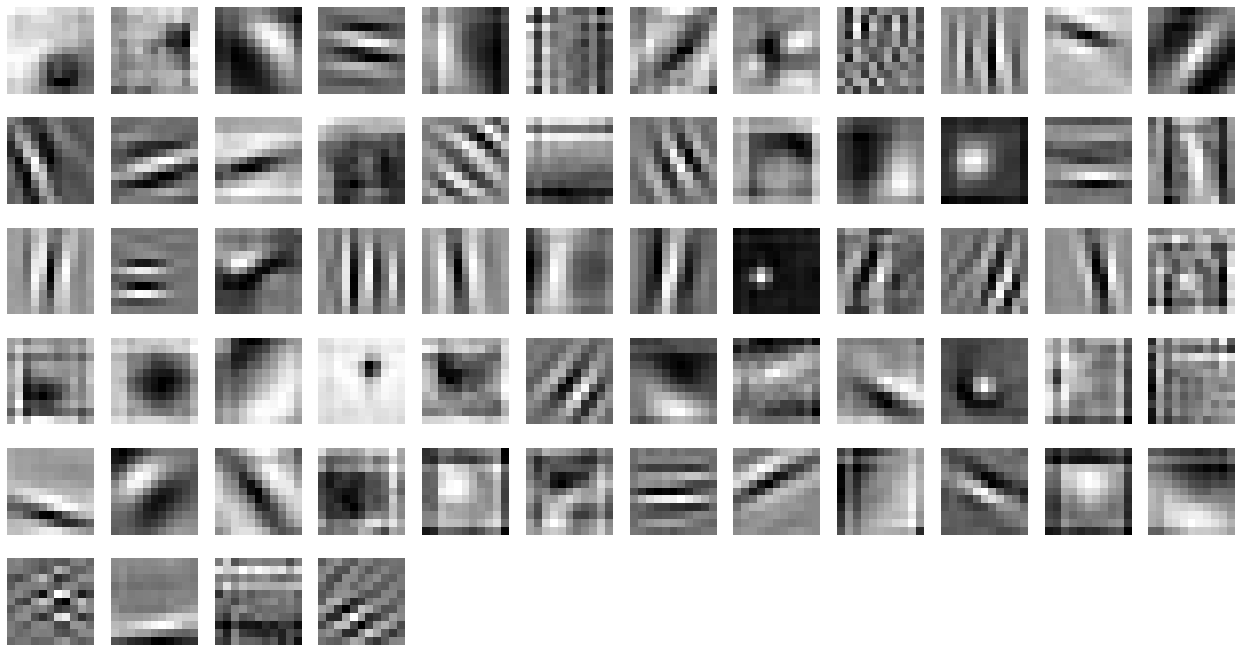

In [ ]:
plt.figure(figsize=(22, 24))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(12, 12, i+1) # (12, 12) because in conv0 we have 11x11 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    plt.savefig('filter.png')
plt.show()

The tensor printed below represents one of the 11x11 filters in the first conv layer of AlexNet which sensitive to features spread over a larger region in the input image.

We can see that the values in the middle of the filter and left bottom are positive and relatively large compared to other values in the filter. It seems that the filter is trying to detect a specific pattern in the input image that is centered around a particular pixel.

As we move away from the this part, the values become smaller. This may suggest that the filter is looking for edges or patterns that are oriented in different directions(complex patterns or textures in the input image, such as grids).

tensor([[ 0.1186,  0.0941,  0.0954,  0.1052,  0.1029,  0.0672,  0.0505,  0.0501,
          0.0558,  0.0216,  0.0500],
        [ 0.0749,  0.0389,  0.0530,  0.0760,  0.0723,  0.0729,  0.0520,  0.0271,
          0.0257, -0.0113,  0.0042],
        [ 0.0754,  0.0388,  0.0549,  0.0558,  0.0525,  0.0500,  0.0476,  0.0253,
          0.0436,  0.0102,  0.0133],
        [ 0.0704,  0.0525,  0.0631,  0.0622,  0.0589,  0.0386,  0.0450,  0.0381,
          0.0458,  0.0019,  0.0030],
        [ 0.0873,  0.0750,  0.0716,  0.0834,  0.0946,  0.0654,  0.0335,  0.0210,
          0.0221, -0.0106, -0.0343],
        [ 0.0958,  0.0992,  0.1006,  0.1088,  0.0726,  0.0361, -0.0075, -0.0431,
         -0.0379, -0.0568, -0.0560],
        [ 0.1150,  0.1155,  0.1071,  0.0915,  0.0029, -0.0900, -0.1133, -0.1391,
         -0.1248, -0.0845, -0.0745],
        [ 0.0955,  0.1103,  0.0825,  0.0421, -0.0594, -0.1595, -0.1237, -0.1581,
         -0.1643, -0.1153, -0.0928],
        [ 0.0932,  0.1037,  0.0675,  0.0244, -0.0697, -0

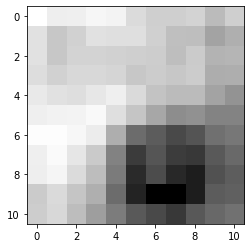

In [21]:
filter1 = model_weights[0][0]
print(filter1[0, :, :])
plt.imshow(filter1[0, :, :].detach(), cmap='gray')
plt.show()

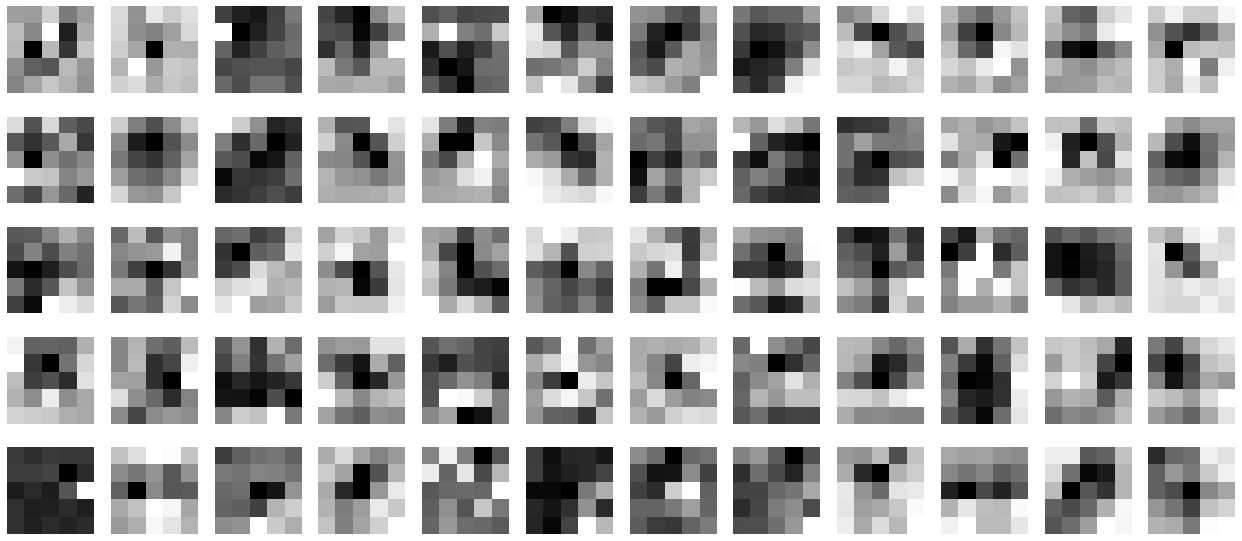

In [ ]:
plt.figure(figsize=(22, 24))
for i, filter in enumerate(model_weights[1]):#4th conv layer
    plt.subplot(12, 12, i+1) 
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    if i ==59:
      break
plt.show()

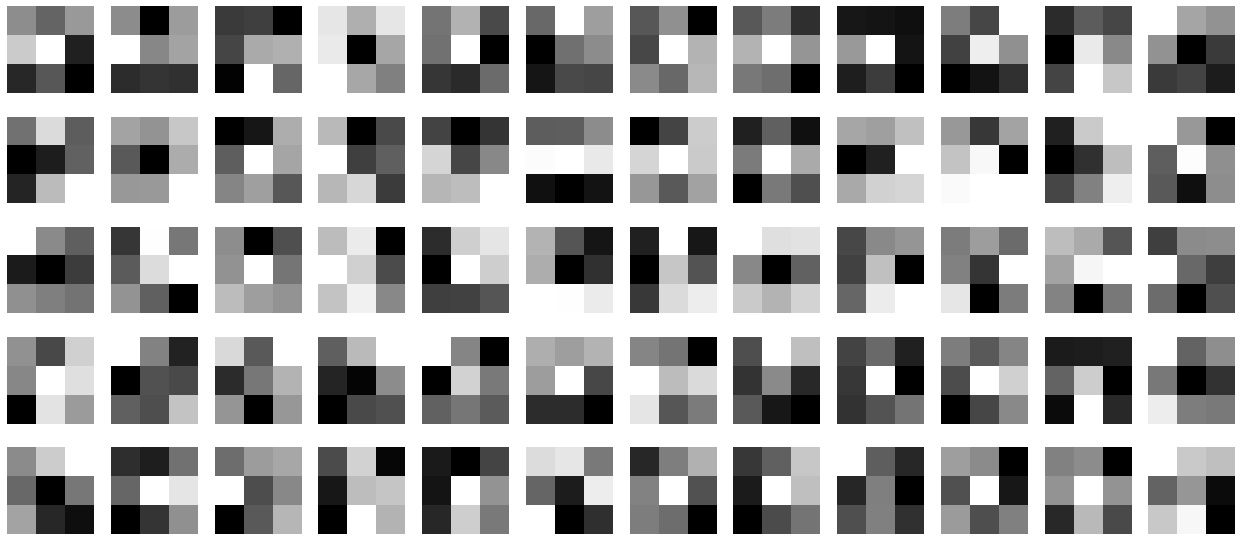

In [ ]:
plt.figure(figsize=(22, 24))
for i, filter in enumerate(model_weights[2]):#4th conv layer
    plt.subplot(12, 12, i+1) 
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    if i ==59:
      break
plt.show()

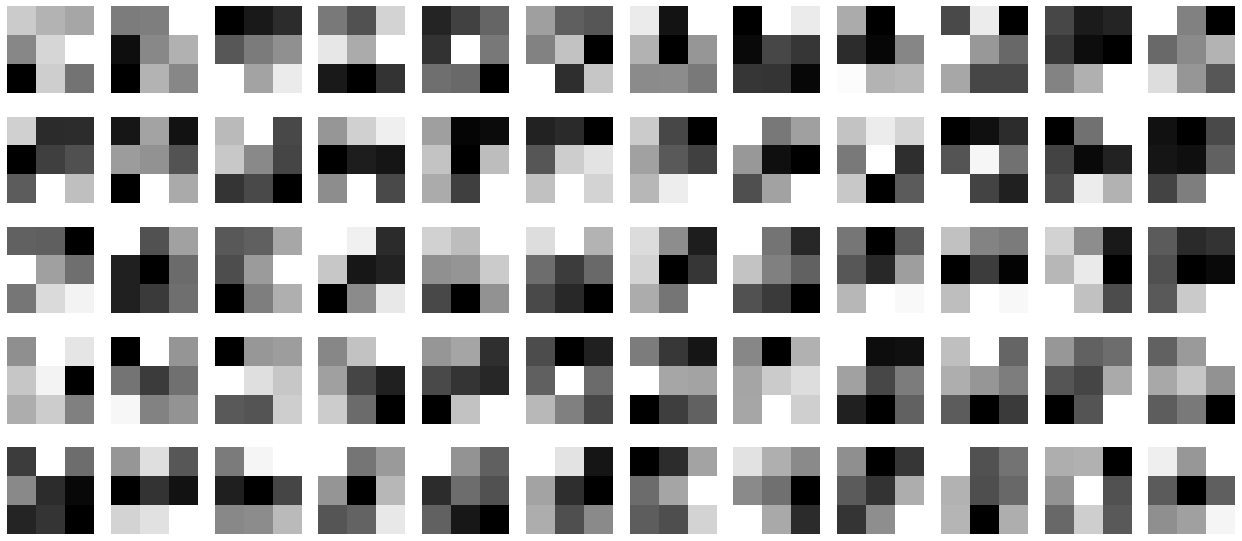

In [ ]:
plt.figure(figsize=(22, 24))
for i, filter in enumerate(model_weights[3]):#4th conv layer
    plt.subplot(12, 12, i+1) 
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    if i ==59:
      break
plt.show()

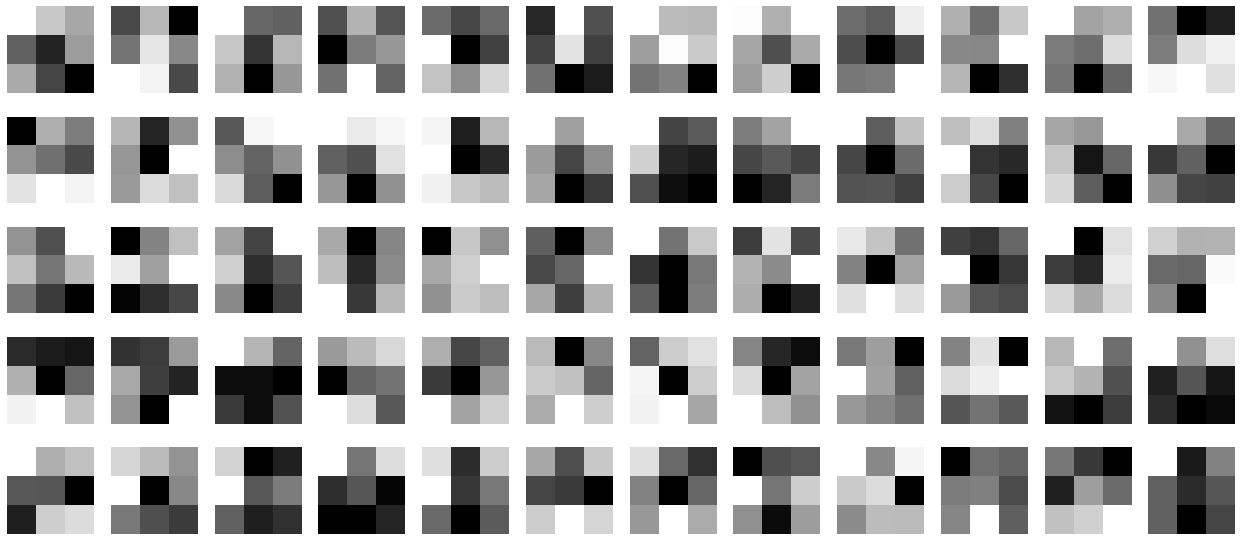

In [ ]:
plt.figure(figsize=(22, 24))
for i, filter in enumerate(model_weights[4]):#5th conv layer
    plt.subplot(12, 12, i+1) 
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    if i ==59:
      break
plt.show()

The tensor printed below  represents one of the 3x3 filters in the last conv layer of AlexNet which sensitive to specific features in the input image.

W know that each element of the filter represents the weight of a connection between a particular input pixel and the output feature map. A positive weight indicates that the input pixel is positively correlated with the output feature, while a negative weight indicates a negative correlation.

We can see that the center element has a negative weight of -0.0441 and so do the upper element and downer element.the first row has the most positive values among all. It is likely that this filter is sensitive to vertical edges, and since there are 2 dark rows below this first row it discovers vertical direction edges. 
and alse it could mean it is discovering right top corners since the top 3 elements along the left middle element form a shape like L. 

This filter plays an important role in extracting useful features from the input image that can be used for object recognition since it is at the last conv layer.

tensor([[ 0.0045, -0.0077, -0.0150],
        [-0.0303, -0.0441, -0.0176],
        [-0.0143, -0.0367, -0.0520]], grad_fn=<SliceBackward0>)


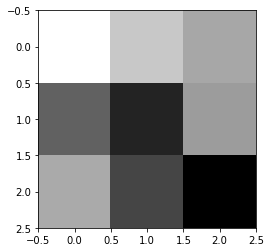

In [17]:
filter1 = model_weights[4][0]
print(filter1[0, :, :])
plt.imshow(filter1[0, :, :].detach(), cmap='gray')
plt.show()

tensor([[-0.0142,  0.0023, -0.0251],
        [-0.0076,  0.0095, -0.0047],
        [ 0.0133,  0.0115, -0.0140]], grad_fn=<SliceBackward0>)


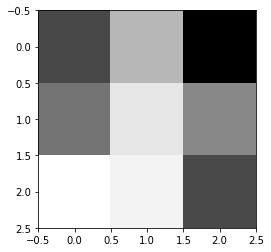

In [19]:
filter2 = model_weights[4][1]
print(filter2[0, :, :])
plt.imshow(filter2[0, :, :].detach(), cmap='gray')
plt.show()

The magnitude of the values is relatively small, which indicates that this filter may be detecting subtle features in the image.

tensor([[ 0.0182, -0.0299, -0.0309],
        [ 0.0006, -0.0452, -0.0044],
        [-0.0060, -0.0618, -0.0145]], grad_fn=<SliceBackward0>)


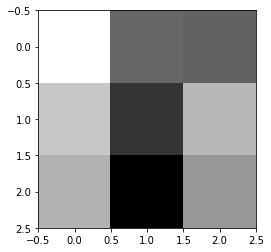

In [20]:
filter3 = model_weights[4][2]
print(filter3[0, :, :])
plt.imshow(filter3[0, :, :].detach(), cmap='gray')
plt.show()

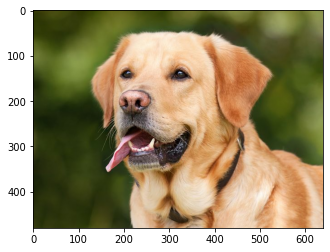

torch.Size([3, 512, 512])
torch.Size([1, 3, 512, 512])


In [ ]:
# read and visualize an image
img = cv.imread("dog.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
# define the transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
])
img = np.array(img)
# apply the transforms
img = transform(img)
print(img.size())
# unsqueeze to add a batch dimension
img = img.unsqueeze(0)
print(img.size())

## Feature Map Visualization
In this part we will examine the feature maps generated by AlexNet when it is presented with an image of a dog.Here are some results.

* The first convolutional layer of AlexNet learned simple edge detectors that respond to different orientations of edges and colors. The feature maps in this layer showed high activation in the regions of the dog's fur, where there were strong edges and color contrasts.

* The second convolutional layer learned more complex features such as corners, blobs, and diagonals. The feature maps in this layer showed the outlines of the dog's body and legs.

* The third convolutional layer learned even more complex features such as curves, arcs, and patterns. The feature maps in this layer showed the contours of the dog's head and tail, as well as the patterns on its fur. 
* The fourth and fifth convolutional layers learned even more abstract and high-level features such as object parts, texture, and overall shapes. The feature maps in these layers showed the dog's face, nose, and eyes, as well as the texture and patterns on its fur.

The lower-level layers learned simple features such as edges and colors, while the higher-level layers learned more complex and abstract features such as object parts and overall shapes. These features were used by the fully connected layers to classify the input image into different categories.


In [ ]:
# pass the image through all the layers
results = [conv_layers[0](img)]
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))
# make a copy of the `results`
outputs = results

torch.Size([64, 127, 127])
Saving layer 0 feature maps...


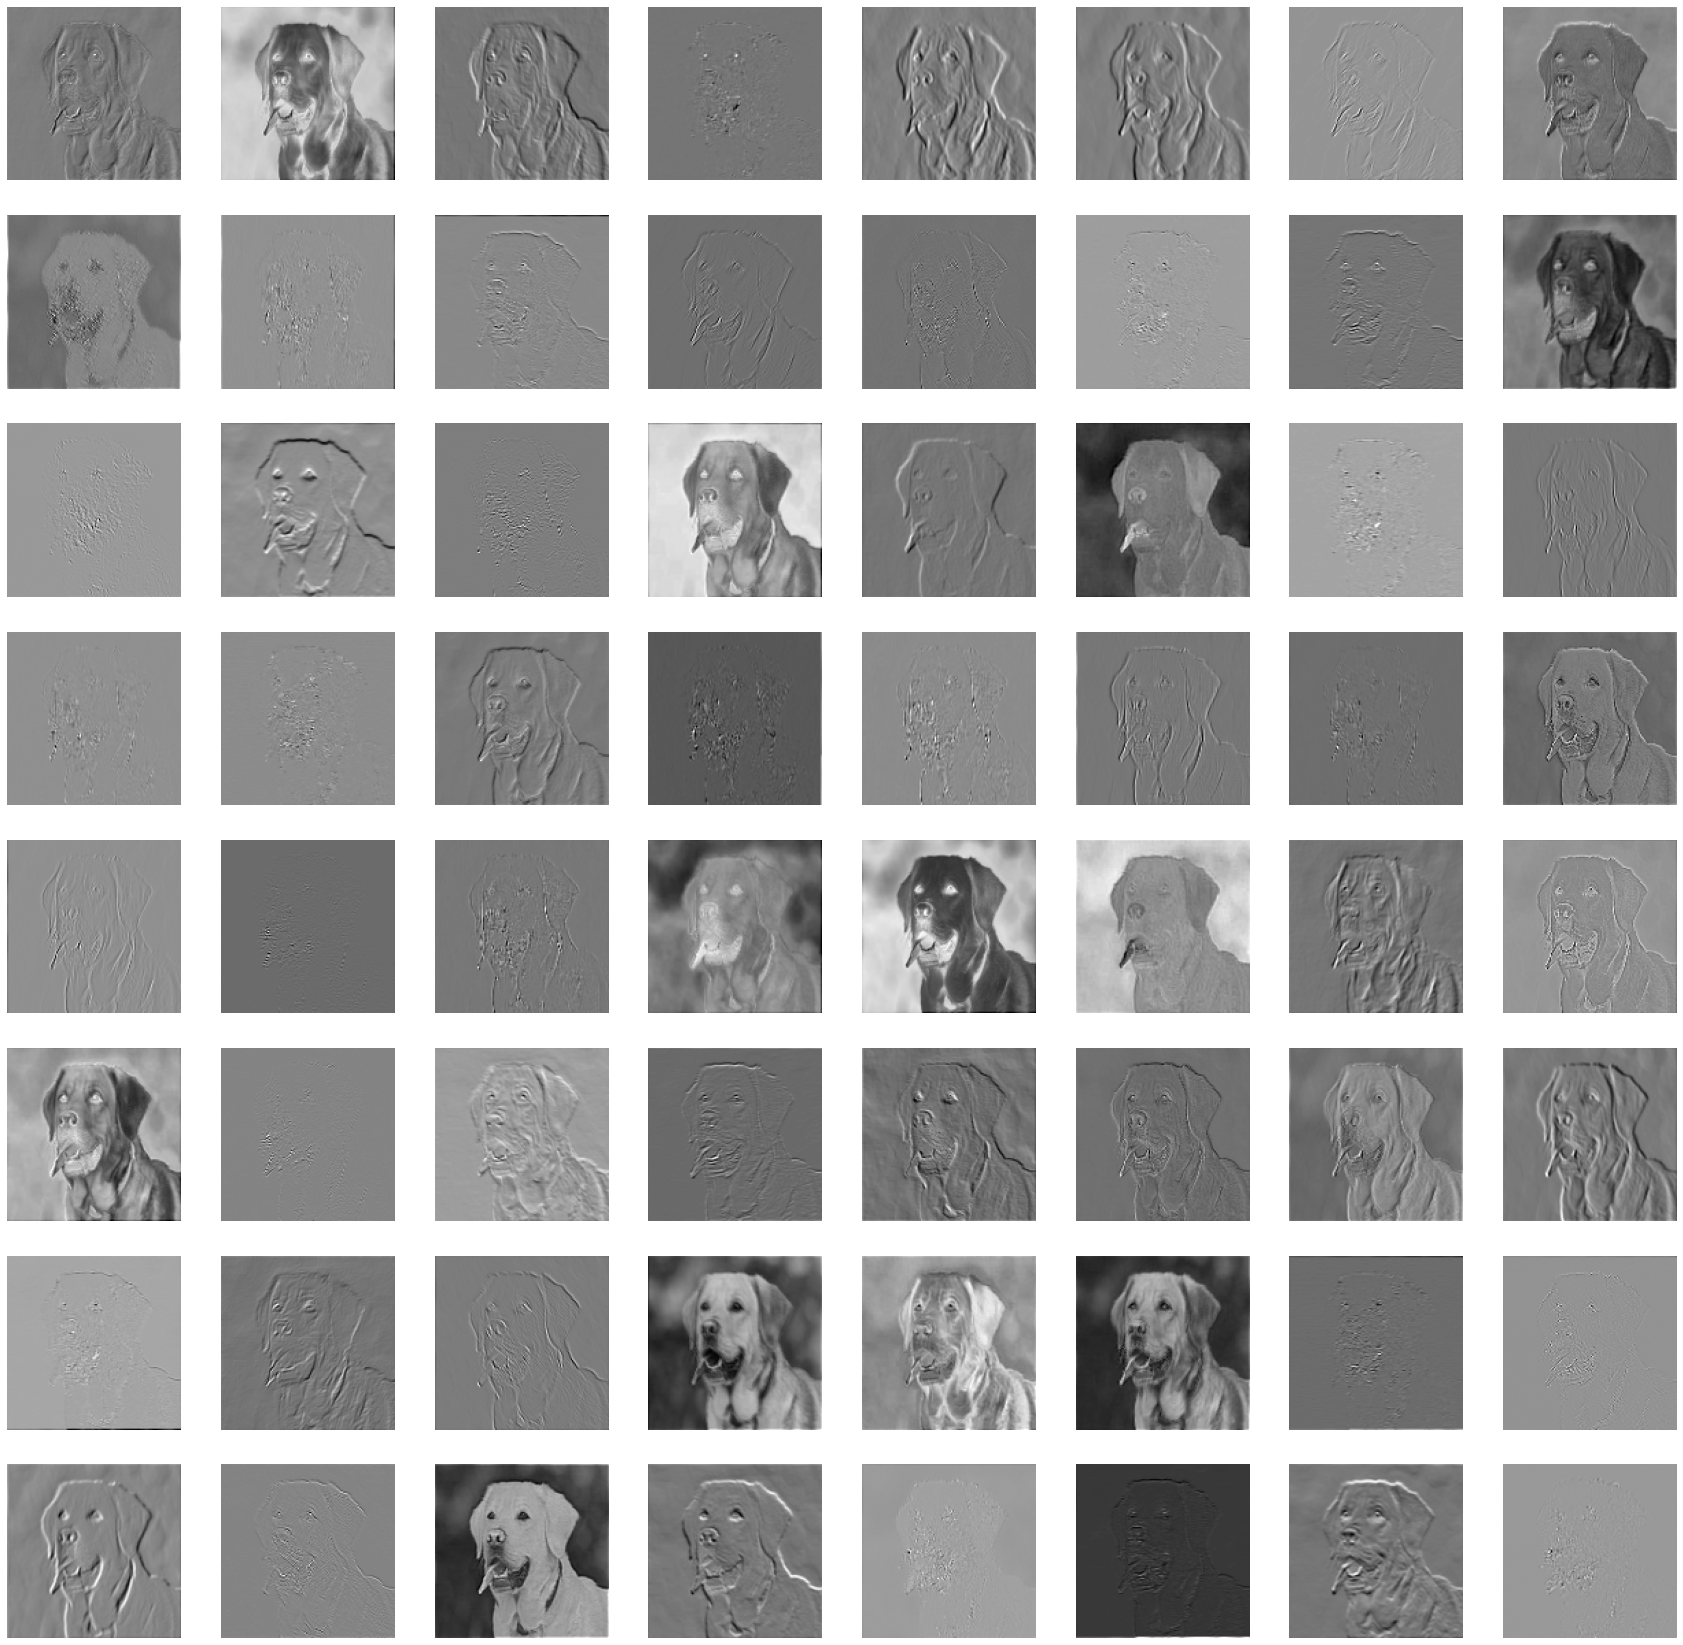

torch.Size([192, 127, 127])
Saving layer 1 feature maps...


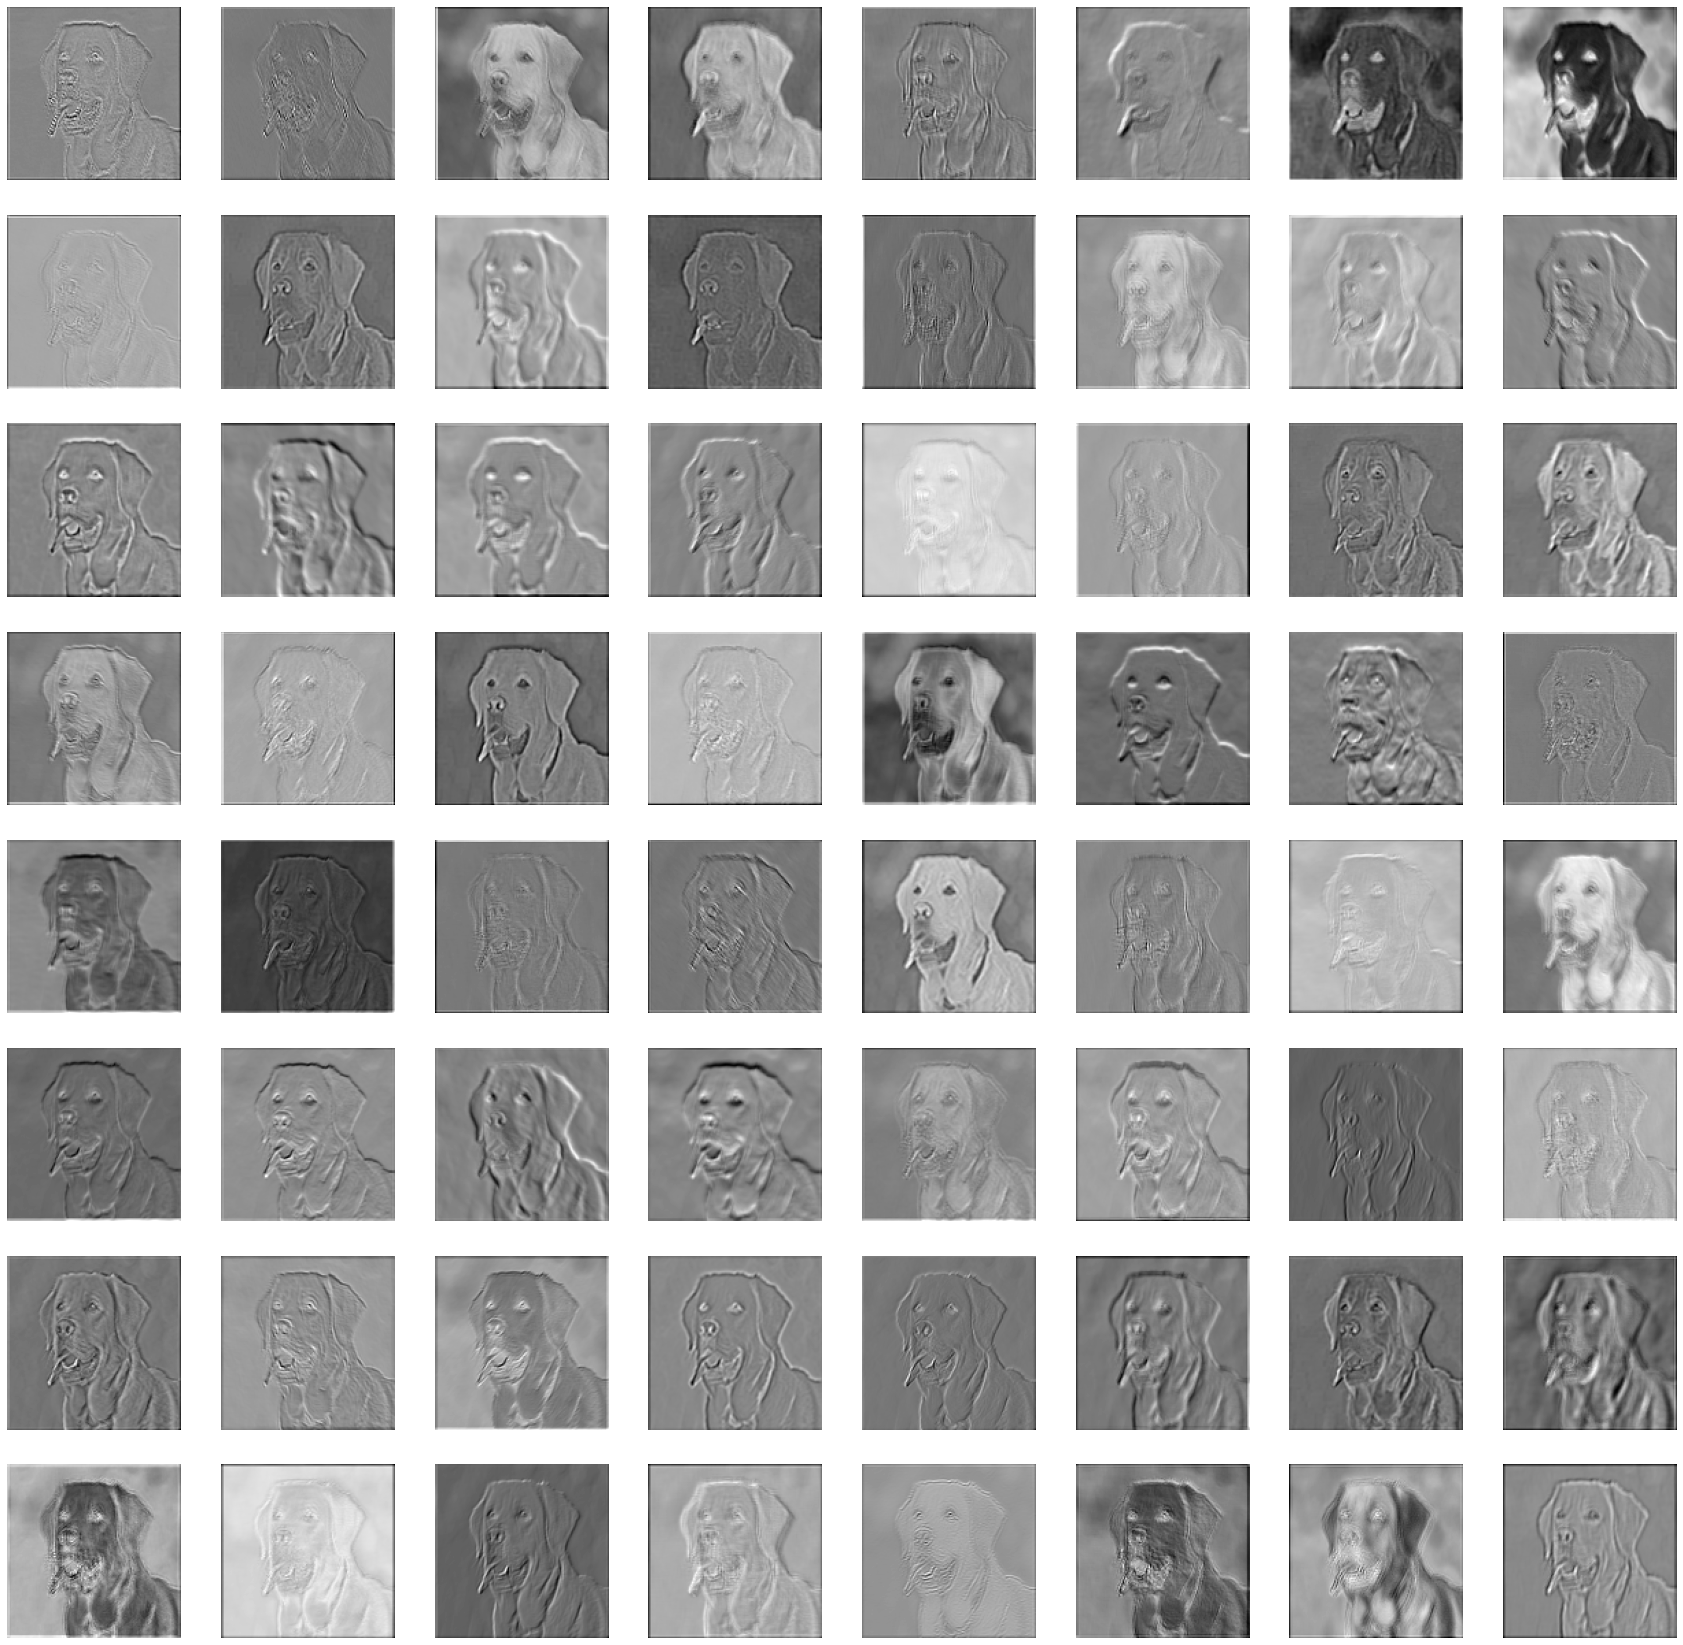

torch.Size([384, 127, 127])
Saving layer 2 feature maps...


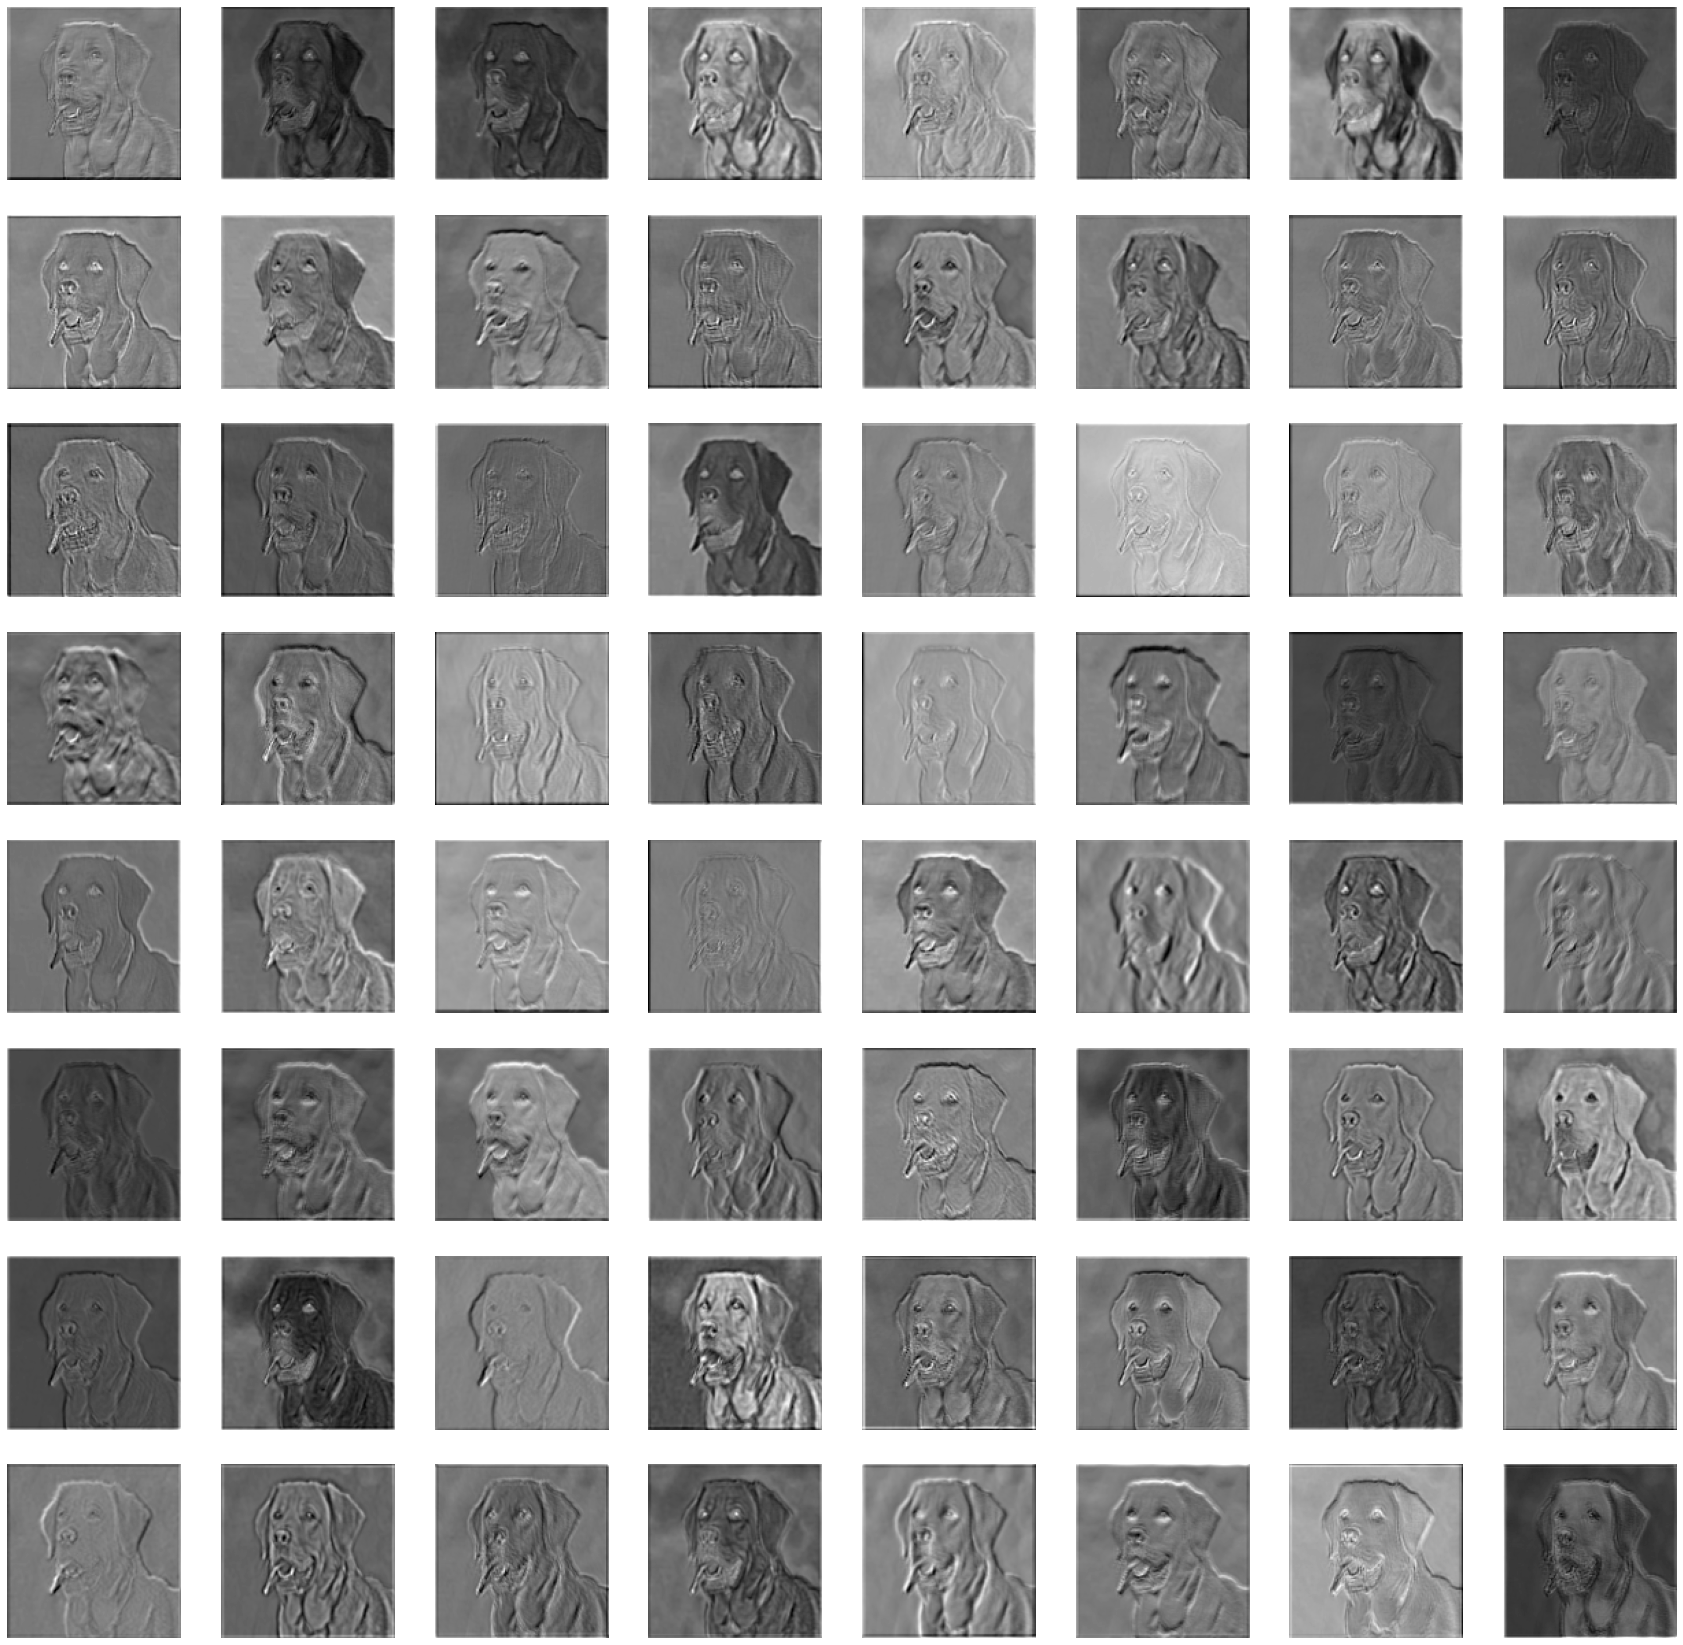

torch.Size([256, 127, 127])
Saving layer 3 feature maps...


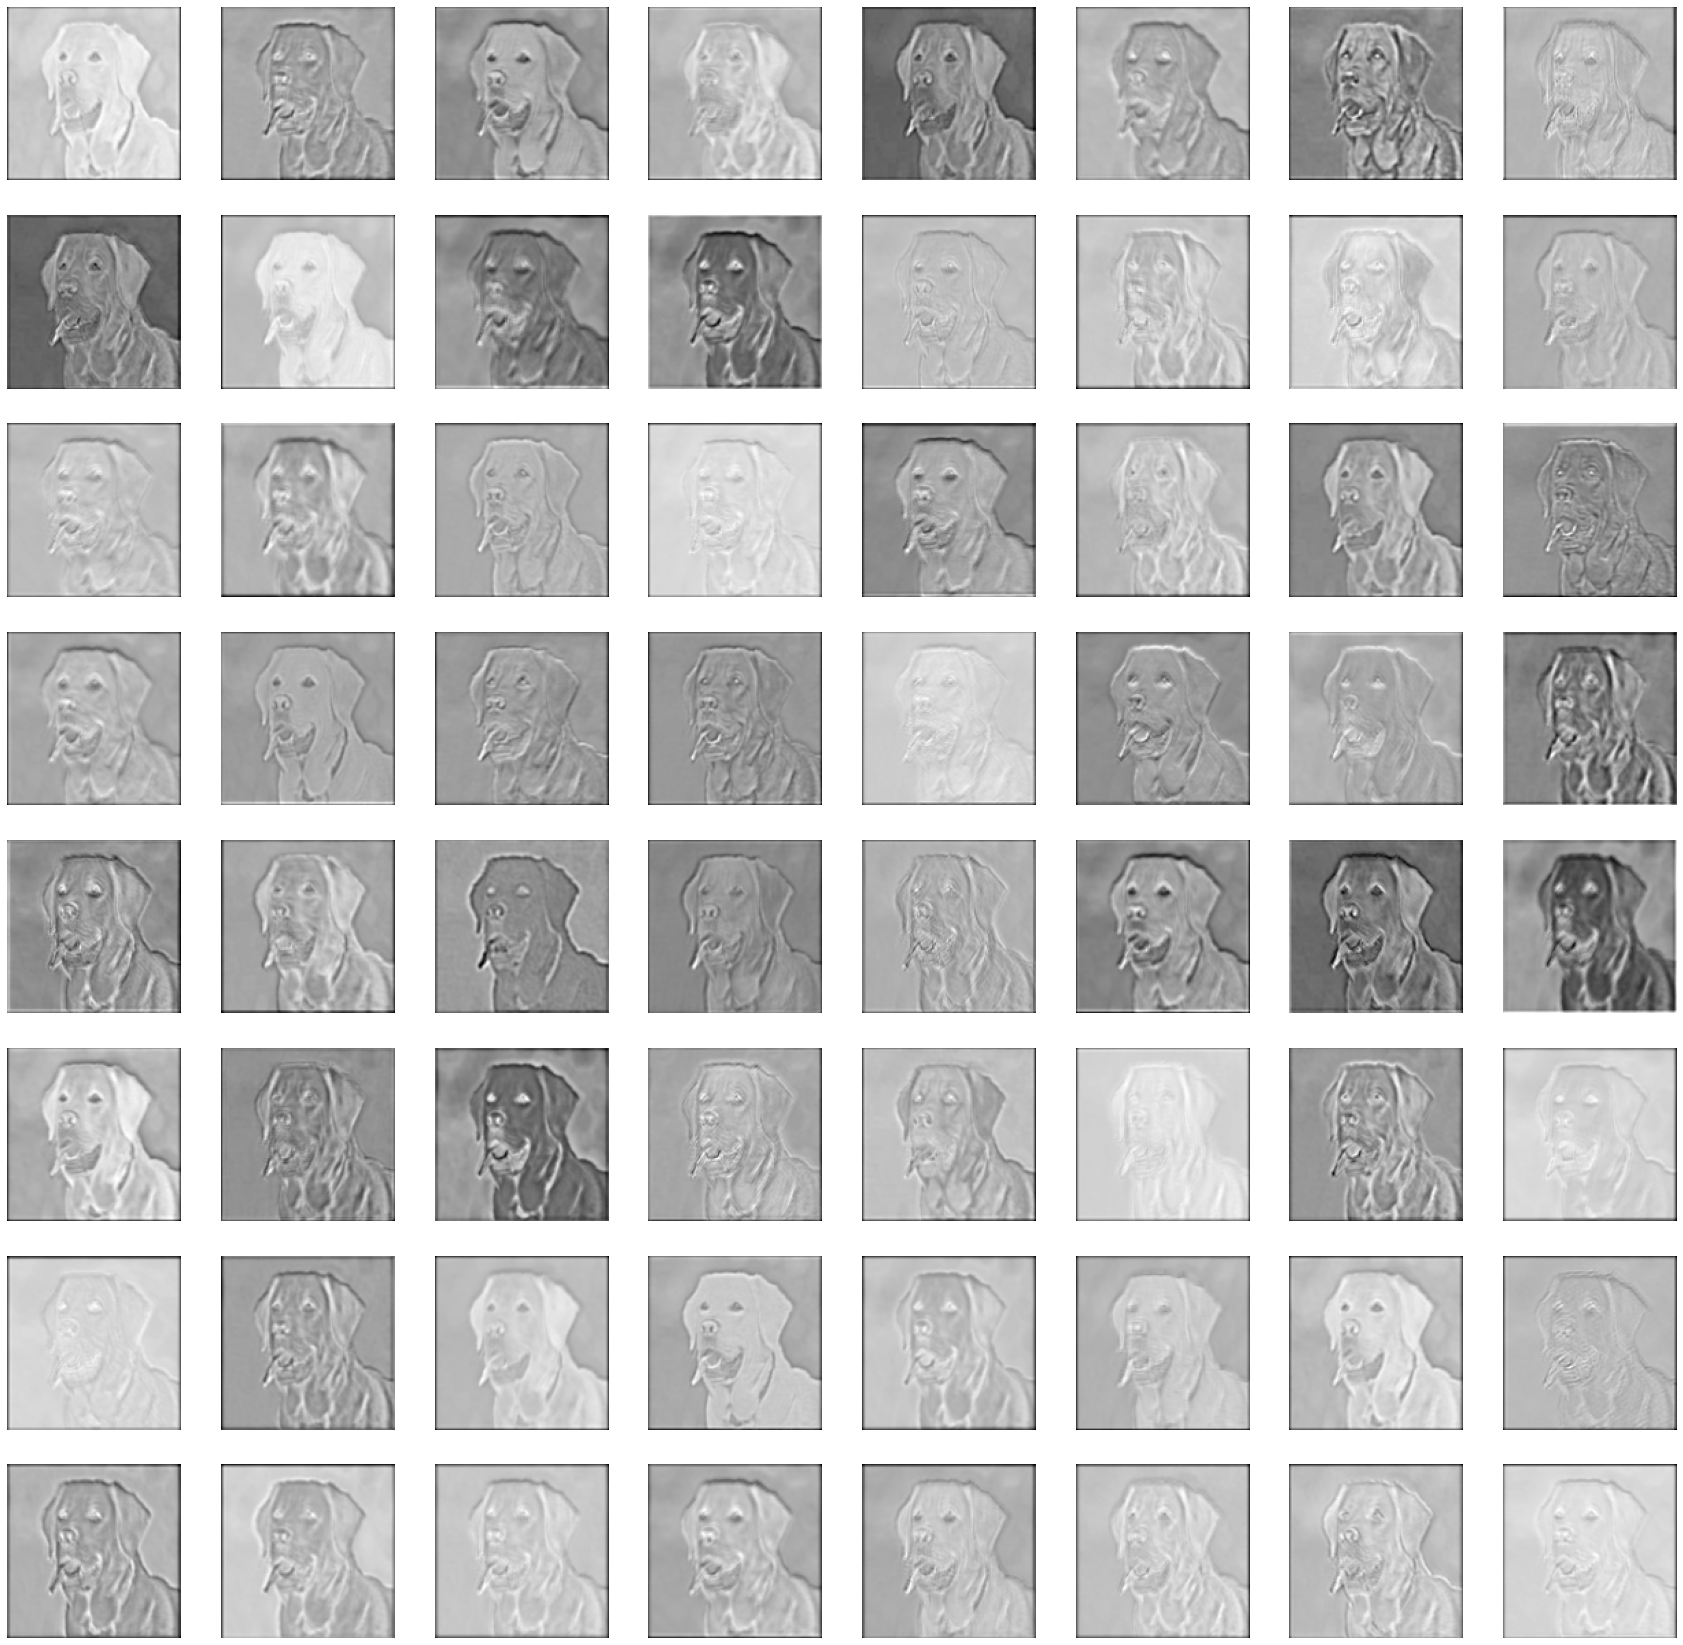

torch.Size([256, 127, 127])
Saving layer 4 feature maps...


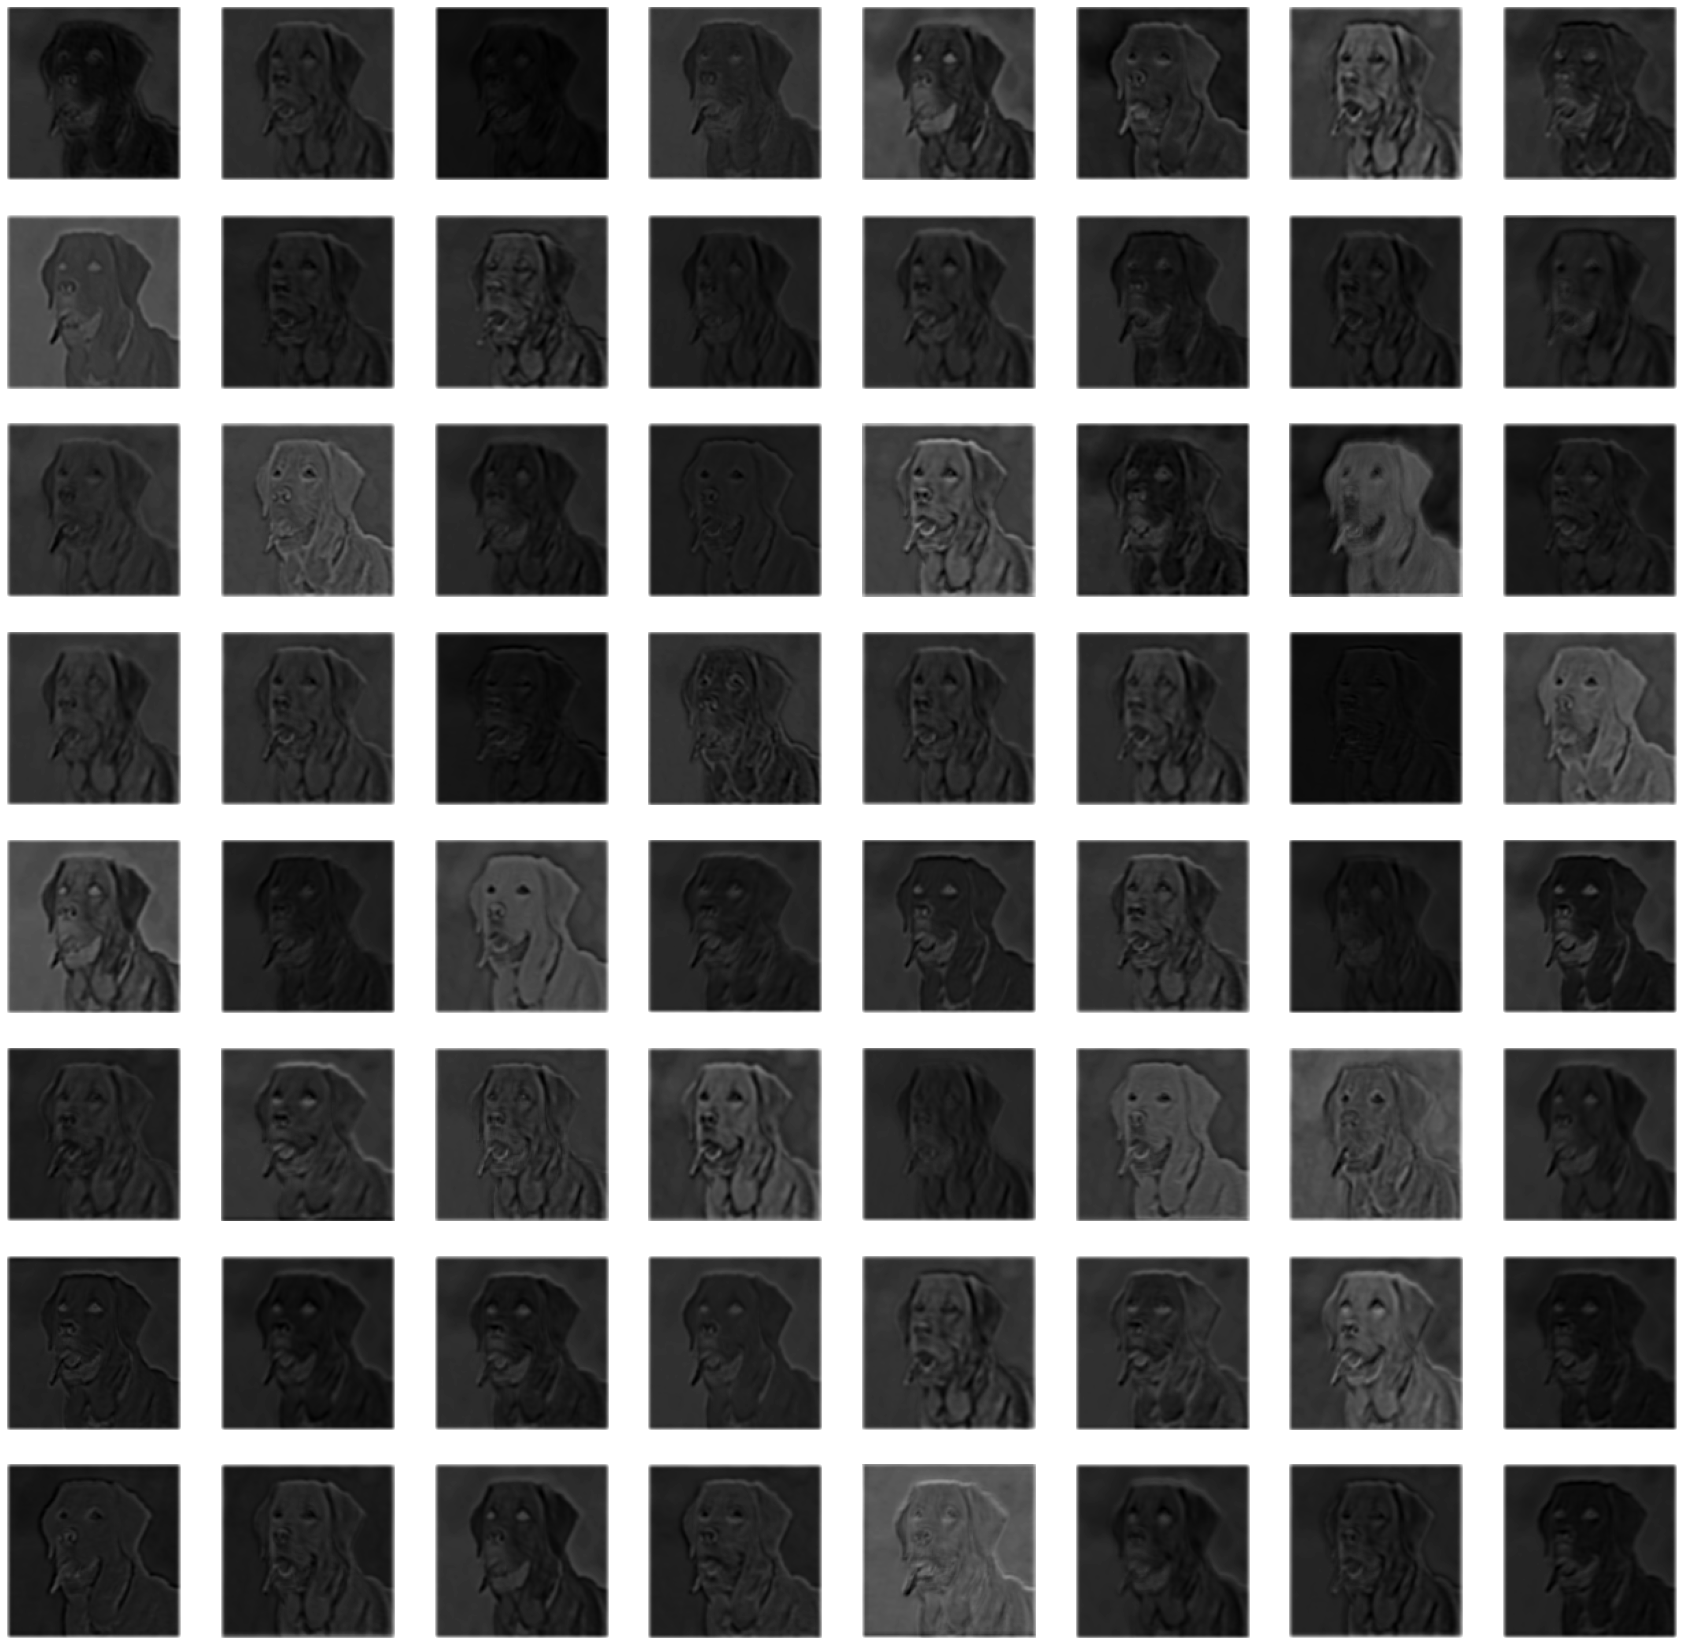

In [ ]:
# visualize 64 features from each layer 
# (although there are more feature maps in the upper layers)
for num_layer in range(len(outputs)):
    plt.figure(figsize=(30, 30))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print(layer_viz.size())
    for i, filter in enumerate(layer_viz):
        if i == 64: # we will visualize only 8x8 blocks from each layer
            break
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")
    print(f"Saving layer {num_layer} feature maps...")
    plt.show()
    plt.close()